In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import time 
import scipy
import investpy
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# Import data

In [2]:
ft = yf.download("BEM.BK EGCO.BK AOT.BK III.BK JWD.BK CK.BK UNIQ.BK SI=F PL=F HG=F",start="2010-01-02",end="2020-08-31")
ft.fillna(method='bfill', inplace=True)
ft = ft.dropna()
ft = ft['Adj Close']
ft.head()

[*********************100%***********************]  10 of 10 completed


,AOT.BK,BEM.BK,CK.BK,EGCO.BK,HG=F,III.BK,JWD.BK,PL=F,SI=F,UNIQ.BK
Date,,,,,,,,,,
2010-01-04,0.928125,1.677726,4.707637,52.264484,3.3880,6.989031,8.132976,1517.300049,17.440001,5.188159
2010-01-05,0.934113,1.677726,4.632317,52.588097,3.3960,6.989031,8.132976,1530.800049,17.781000,5.151363
2010-01-06,0.946088,1.677726,4.669978,52.102650,3.4775,6.989031,8.132976,1552.199951,18.163000,5.151363
2010-01-07,0.958064,1.698970,4.632317,52.102650,3.4115,6.989031,8.132976,1553.000000,18.333000,5.151363
2010-01-08,0.958064,1.677726,4.669978,52.102650,3.3880,6.989031,8.132976,1564.599976,18.458000,5.188159


In [3]:
st = yf.download("PTTEP.BK TVO.BK CPF.BK SCC.BK BTS.BK",start="2010-01-02",end="2020-08-31")
st.fillna(method='bfill', inplace=True)
st = st.dropna()
st = st['Adj Close']
st.head()

[*********************100%***********************]  5 of 5 completed


,BTS.BK,CPF.BK,PTTEP.BK,SCC.BK,TVO.BK
Date,,,,,
2010-01-04,2.281962,7.740198,91.686096,159.190170,8.899861
2010-01-05,2.281962,7.603206,92.628090,159.190170,8.899861
2010-01-06,2.243924,7.740198,93.570053,157.140518,8.949582
2010-01-07,2.243924,7.740198,92.628090,154.407623,8.999301
2010-01-08,2.243924,8.014190,93.256287,155.090866,9.049023


In [4]:
PTT = ft.join(st['BTS.BK'])
PTT = PTT.dropna()
PTT

,AOT.BK,BEM.BK,CK.BK,EGCO.BK,HG=F,III.BK,JWD.BK,PL=F,SI=F,UNIQ.BK,BTS.BK
Date,,,,,,,,,,,
2010-01-04,0.928125,1.677726,4.707637,52.264484,3.3880,6.989031,8.132976,1517.300049,17.440001,5.188159,2.281962
2010-01-05,0.934113,1.677726,4.632317,52.588097,3.3960,6.989031,8.132976,1530.800049,17.781000,5.151363,2.281962
2010-01-06,0.946088,1.677726,4.669978,52.102650,3.4775,6.989031,8.132976,1552.199951,18.163000,5.151363,2.243924
2010-01-07,0.958064,1.698970,4.632317,52.102650,3.4115,6.989031,8.132976,1553.000000,18.333000,5.151363,2.243924
2010-01-08,0.958064,1.677726,4.669978,52.102650,3.3880,6.989031,8.132976,1564.599976,18.458000,5.188159,2.243924
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24,56.750000,9.250000,17.799999,224.918915,2.9225,4.840000,7.250000,920.799988,26.587999,4.820000,10.400000
2020-08-25,57.000000,9.250000,17.700001,224.918915,2.9310,4.760000,7.350000,930.599976,26.254000,4.840000,10.400000
2020-08-26,57.000000,9.250000,17.900000,224.918915,2.9595,4.780000,7.600000,936.400024,27.430000,4.880000,10.700000


In [5]:
# df = pd.read_csv('BZ=F.csv')
# df = df.rename(columns={'วันเดือนปี' : 'Date','ล่าสุด' : 'BZ=F'})
# df = df[['BZ=F']]

# PTT = PTT.merge(df)
# PTT

# Visualize the Time Series

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


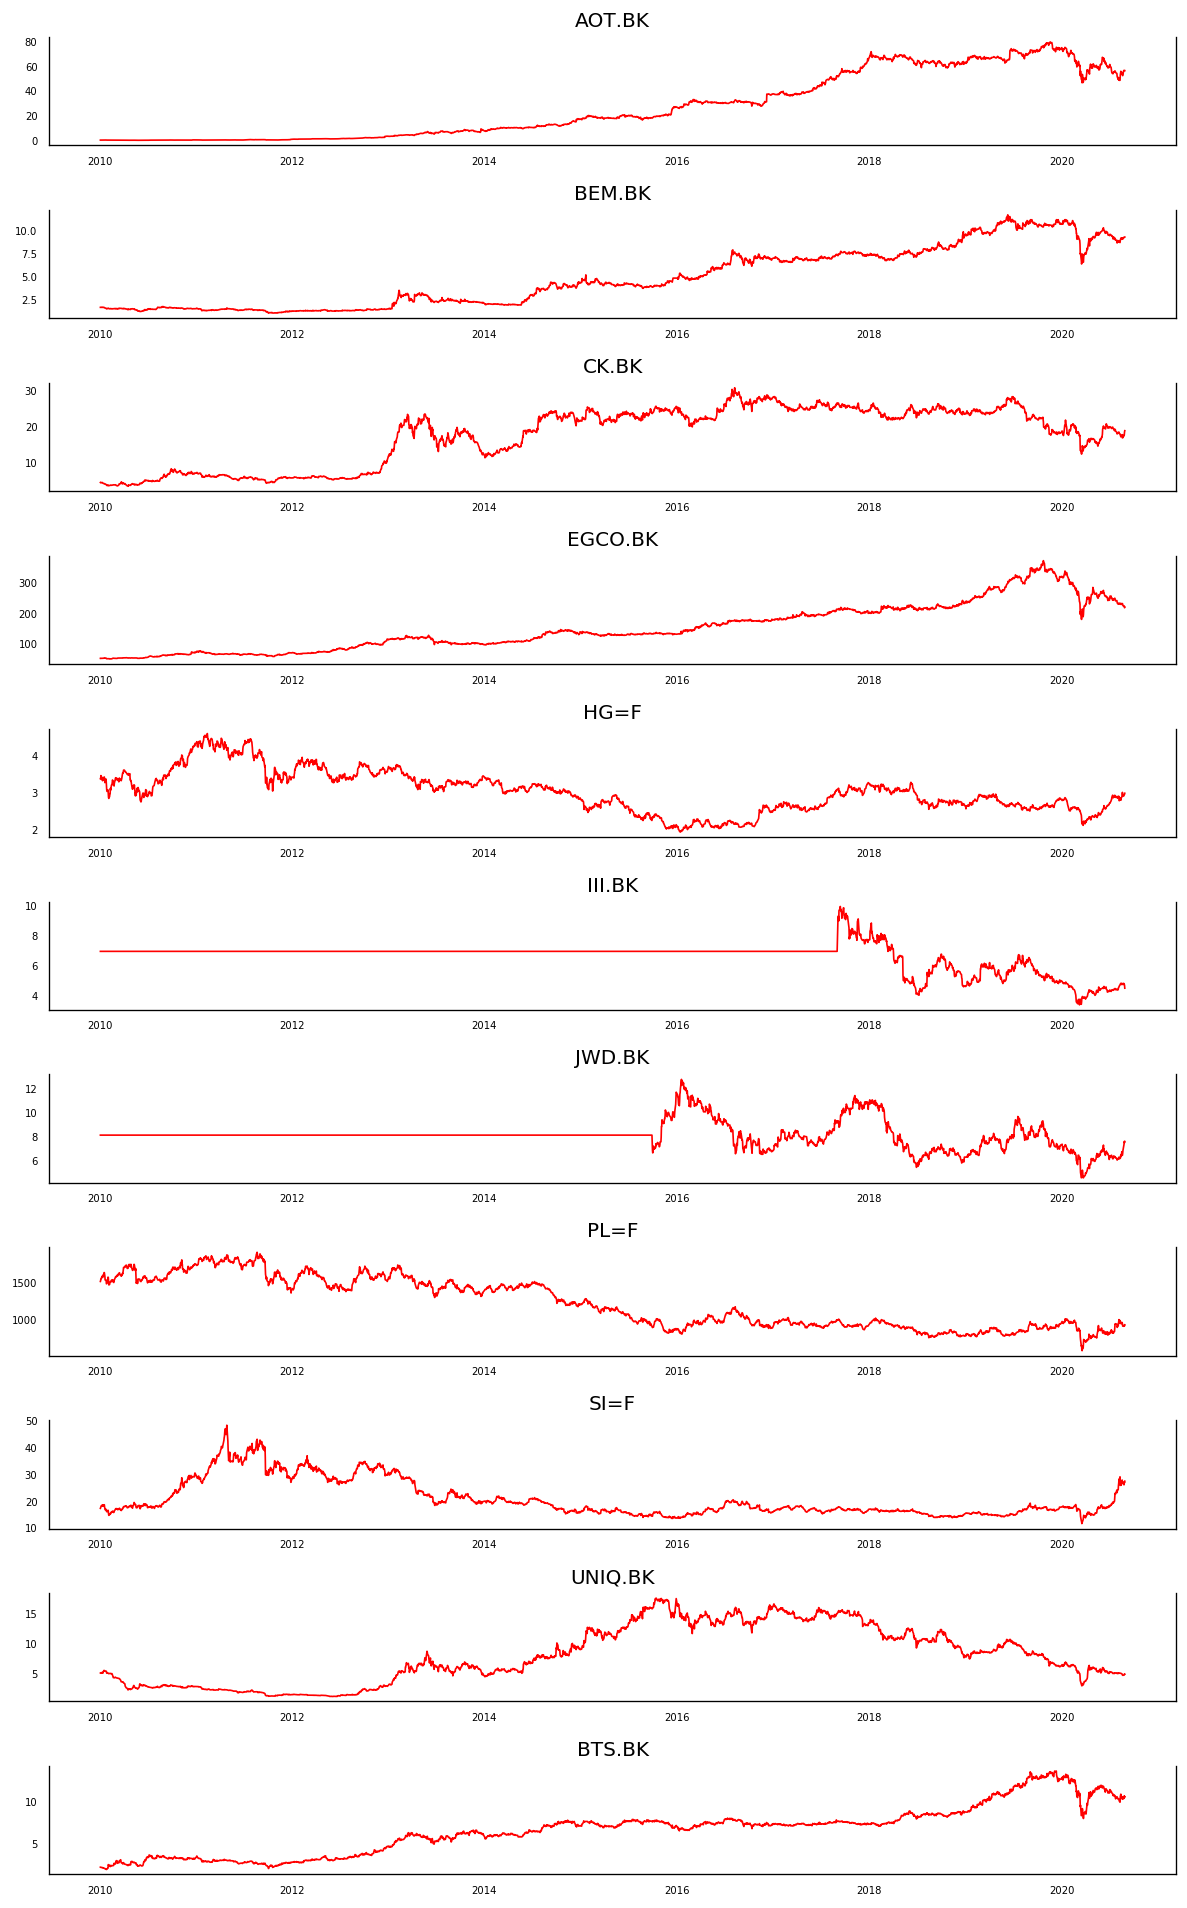

In [6]:
fig, axes = plt.subplots(nrows=len(PTT.columns), ncols=1, dpi=120, figsize=(10,16))
for i, ax in enumerate(axes.flatten()):
    data = PTT[PTT.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(PTT.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Correlation

In [7]:
PTT.corr()

,AOT.BK,BEM.BK,CK.BK,EGCO.BK,HG=F,III.BK,JWD.BK,PL=F,SI=F,UNIQ.BK,BTS.BK
AOT.BK,1.000000,0.964653,0.683694,0.955498,-0.553517,-0.522913,-0.163680,-0.870632,-0.600530,0.518890,0.870447
BEM.BK,0.964653,1.000000,0.737907,0.973948,-0.630690,-0.553144,-0.216432,-0.879355,-0.616692,0.549969,0.921433
CK.BK,0.683694,0.737907,1.000000,0.698061,-0.736520,-0.123822,0.036630,-0.817388,-0.707070,0.886023,0.759216
EGCO.BK,0.955498,0.973948,0.698061,1.000000,-0.575795,-0.559490,-0.202976,-0.835452,-0.563428,0.476745,0.946435
HG=F,-0.553517,-0.630690,-0.736520,-0.575795,1.000000,0.265579,-0.004033,0.833349,0.802672,-0.752597,-0.675134
III.BK,-0.522913,-0.553144,-0.123822,-0.559490,0.265579,1.000000,0.684390,0.422500,0.218795,0.126011,-0.571131
JWD.BK,-0.163680,-0.216432,0.036630,-0.202976,-0.004033,0.684390,1.000000,0.104998,0.009384,0.248267,-0.211512
PL=F,-0.870632,-0.879355,-0.817388,-0.835452,0.833349,0.422500,0.104998,1.000000,0.790885,-0.746321,-0.838306
SI=F,-0.600530,-0.616692,-0.707070,-0.563428,0.802672,0.218795,0.009384,0.790885,1.000000,-0.703880,-0.646064
UNIQ.BK,0.518890,0.549969,0.886023,0.476745,-0.752597,0.126011,0.248267,-0.746321,-0.703880,1.000000,0.529054


# Testing Causation using Granger’s Causality Test

In [8]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    PTT = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in PTT.columns:
        for r in PTT.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            PTT.loc[r, c] = min_p_value
    PTT.columns = [var + '_x' for var in variables]
    PTT.index = [var + '_y' for var in variables]
    return PTT

grangers_causation_matrix(PTT, variables = PTT.columns)   

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, bu

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


,AOT.BK_x,BEM.BK_x,CK.BK_x,EGCO.BK_x,HG=F_x,III.BK_x,JWD.BK_x,PL=F_x,SI=F_x,UNIQ.BK_x,BTS.BK_x
AOT.BK_y,1.0000,0.0000,0.0511,0.0000,0.1374,0.0012,0.1753,0.0039,0.1913,0.0113,0.0009
BEM.BK_y,0.0000,1.0000,0.0715,0.0000,0.0623,0.2587,0.0002,0.0011,0.0310,0.3625,0.0017
CK.BK_y,0.0704,0.0019,1.0000,0.0806,0.2345,0.3673,0.0518,0.4131,0.5229,0.1477,0.4581
EGCO.BK_y,0.0000,0.0000,0.0147,1.0000,0.1267,0.0069,0.0507,0.0097,0.0623,0.2262,0.0000
HG=F_y,0.0002,0.0636,0.0104,0.0397,1.0000,0.4571,0.2733,0.4375,0.0678,0.0168,0.0254
III.BK_y,0.0093,0.0271,0.6572,0.0080,0.3325,1.0000,0.0000,0.1485,0.3971,0.2054,0.0125
JWD.BK_y,0.0000,0.0092,0.2284,0.0011,0.4952,0.0024,1.0000,0.3193,0.6799,0.0621,0.0287
PL=F_y,0.0009,0.0006,0.0005,0.0004,0.0076,0.6002,0.1931,1.0000,0.0554,0.0169,0.0106
SI=F_y,0.2681,0.3727,0.0015,0.2893,0.0000,0.5590,0.8054,0.0904,1.0000,0.0069,0.1653
UNIQ.BK_y,0.0419,0.0010,0.0001,0.0105,0.2336,0.3380,0.0050,0.2082,0.6266,1.0000,0.0336


# Cointegration Test

In [9]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(PTT, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(PTT,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(PTT.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(PTT)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
AOT.BK ::  272.79    > 263.2603  =>   True
BEM.BK ::  205.8     > 219.4051  =>   False
CK.BK  ::  143.18    > 179.5199  =>   False
EGCO.BK ::  102.02    > 143.6691  =>   False
HG=F   ::  74.14     > 111.7797  =>   False
III.BK ::  49.62     > 83.9383   =>   False
JWD.BK ::  33.37     > 60.0627   =>   False
PL=F   ::  18.62     > 40.1749   =>   False
SI=F   ::  8.77      > 24.2761   =>   False
UNIQ.BK ::  4.09      > 12.3212   =>   False
BTS.BK ::  0.05      > 4.1296    =>   False


# Split the Series into Training and Testing Data

In [10]:
nobs = 7
ft_train, ft_test = PTT[0:-nobs], PTT[-nobs:]

# Check size
print(ft_train.shape)  
print(ft_test.shape)  
ft_train

(2596, 11)
(7, 11)


,AOT.BK,BEM.BK,CK.BK,EGCO.BK,HG=F,III.BK,JWD.BK,PL=F,SI=F,UNIQ.BK,BTS.BK
Date,,,,,,,,,,,
2010-01-04,0.928125,1.677726,4.707637,52.264484,3.3880,6.989031,8.132976,1517.300049,17.440001,5.188159,2.281962
2010-01-05,0.934113,1.677726,4.632317,52.588097,3.3960,6.989031,8.132976,1530.800049,17.781000,5.151363,2.281962
2010-01-06,0.946088,1.677726,4.669978,52.102650,3.4775,6.989031,8.132976,1552.199951,18.163000,5.151363,2.243924
2010-01-07,0.958064,1.698970,4.632317,52.102650,3.4115,6.989031,8.132976,1553.000000,18.333000,5.151363,2.243924
2010-01-08,0.958064,1.677726,4.669978,52.102650,3.3880,6.989031,8.132976,1564.599976,18.458000,5.188159,2.243924
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-13,56.250000,9.150000,17.400000,233.797302,2.8040,4.780000,6.500000,978.099976,27.694000,5.150000,10.900000
2020-08-14,54.000000,9.200000,17.600000,229.851349,2.8560,4.860000,6.350000,954.400024,26.065001,5.100000,10.600000
2020-08-17,54.250000,9.050000,17.799999,230.837845,2.8980,4.760000,6.750000,963.299988,27.643000,5.050000,10.400000


# Check for Stationarity and Make the Time Series Stationary

In [11]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [12]:
# ADF Test on each column
for name, column in ft_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "AOT.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.6393
 No. Lags Chosen       = 27
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.8619. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BEM.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.5807
 No. Lags Chosen       = 26
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.8753. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CK.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has 

In [13]:
# 1st difference
ft_differenced = ft_train.diff().dropna()

In [14]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in ft_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "AOT.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.0003
 No. Lags Chosen       = 26
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BEM.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.5923
 No. Lags Chosen       = 28
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CK.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level  

In [15]:
# # Second Differencing
# ft_differenced = ft_differenced.diff().dropna()

In [16]:
# # ADF Test on each column of 2nd Differences Dataframe
# for name, column in ft_differenced.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

# Select the Order (P) of VAR model

In [17]:
model = VAR(ft_differenced)
for i in list(range(1,24)):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Lag Order = 1
AIC :  -25.5275780832073
BIC :  -25.22933358044566
FPE :  8.19434071035516e-12
HQIC:  -25.419504149388704 

Lag Order = 2
AIC :  -25.498281387716975
BIC :  -24.926463258622768
FPE :  8.437996055077248e-12
HQIC:  -25.291069368144335 

Lag Order = 3
AIC :  -25.476382524514168
BIC :  -24.630815699091873
FPE :  8.624915316257453e-12
HQIC:  -25.169965089144583 

Lag Order = 4
AIC :  -25.460843790037522
BIC :  -24.34135301644499
FPE :  8.760173853317115e-12
HQIC:  -25.05515353685256 

Lag Order = 5
AIC :  -25.44124490657442
BIC :  -24.04765475086351
FPE :  8.933876108439937e-12
HQIC:  -24.93621436147555 

Lag Order = 6
AIC :  -25.392977626338467
BIC :  -23.725112472195214
FPE :  9.376163173881337e-12
HQIC:  -24.788539243042322 

Lag Order = 7
AIC :  -25.350074855955786
BIC :  -23.407758904440083
FPE :  9.787902031676873e-12
HQIC:  -24.646161015889184 

Lag Order = 8
AIC :  -25.325618407530477
BIC :  -23.108675676815317
FPE :  1.0031212834621655e-11
HQIC:  -24.52216141972532 

L

In [18]:
#Lag Order = 3
x = model.select_order(maxlags=4)
x.summary()

,AIC,BIC,FPE,HQIC
0,-25.49,-25.47*,8.482e-12,-25.48*
1,-25.52*,-25.22,8.271e-12*,-25.41
2,-25.49,-24.92,8.495e-12,-25.28
3,-25.47,-24.63,8.657e-12,-25.17
4,-25.46,-24.34,8.760e-12,-25.06


# Train the VAR Model of Selected Order(p)

In [19]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 30, Oct, 2020
Time:                     10:47:49
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -24.9265
Nobs:                     2593.00    HQIC:                  -25.2911
Log likelihood:          -7160.86    FPE:                8.43800e-12
AIC:                     -25.4983    Det(Omega_mle):     7.65688e-12
--------------------------------------------------------------------
Results for equation AOT.BK
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.021786         0.013067            1.667           0.095
L1.AOT.BK         -0.090088         0.023366           -3.856           0.000
L1.BEM.BK          0.014446         0.145918            0.099          

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [20]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(PTT.columns, out):
    print( col,':', round(val, 2))

AOT.BK : 2.0
BEM.BK : 2.01
CK.BK : 1.99
EGCO.BK : 2.0
HG=F : 2.0
III.BK : 2.0
JWD.BK : 1.99
PL=F : 2.01
SI=F : 2.0
UNIQ.BK : 2.0
BTS.BK : 2.01


# Forecast VAR model using statsmodels

In [21]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = ft_differenced.values[-lag_order:]
forecast_input

2


array([[  1.        ,   0.14999962,   0.20000076,   1.97296143,
          0.07299995,   0.01999998,  -0.30000019,   7.79998779,
          0.40600014,  -0.07000017,   0.20000076],
       [ -2.        ,  -0.09999943,  -0.89999962,   0.        ,
          0.0480001 ,   0.        ,   0.        , -19.09997559,
         -0.73399925,  -0.11999989,  -0.30000019]])

In [22]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
ft_forecast = pd.DataFrame(fc, index=PTT.index[-nobs:], columns=PTT.columns + '_1d')
ft_forecast


,AOT.BK_1d,BEM.BK_1d,CK.BK_1d,EGCO.BK_1d,HG=F_1d,III.BK_1d,JWD.BK_1d,PL=F_1d,SI=F_1d,UNIQ.BK_1d,BTS.BK_1d
Date,,,,,,,,,,,
2020-08-20,0.312594,0.008351,0.140824,0.601395,0.005451,-0.010458,0.000261,2.612963,0.070996,0.012001,0.062938
2020-08-21,-0.040568,-0.018521,-0.032588,-0.541144,-0.004435,-0.010655,-0.031848,-3.345587,-0.060030,-0.038691,-0.014594
2020-08-24,0.028815,0.003364,-0.002449,0.107249,0.000450,-0.001793,-0.002362,-0.216987,0.009725,0.001862,0.003700
2020-08-25,0.011956,0.002599,0.002516,0.083537,-0.000512,-0.000464,-0.000672,-0.637042,-0.001076,-0.001307,0.002499
2020-08-26,0.021189,0.002817,0.005424,0.068545,-0.000074,-0.000867,-0.000500,-0.209011,0.003962,-0.000185,0.003228
2020-08-27,0.019807,0.002716,0.004584,0.066665,-0.000217,-0.000955,-0.000766,-0.251794,0.003653,-0.000265,0.003050
2020-08-28,0.020281,0.002861,0.004788,0.070075,-0.000167,-0.000859,-0.000676,-0.232135,0.003503,-0.000130,0.003112


# Invert the transformation to get the real forecast

In [23]:
def invert_transformation(ft_train, ft_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    ft_fc = ft_forecast.copy()
    columns = ft_train.columns
    for col in columns:        
        # Roll back 2nd Diff
#         if second_diff:
#             ft_fc[str(col)+'_1d'] = (ft_train[col].iloc[-1]-ft_train[col].iloc[-2]) + ft_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        ft_fc[str(col)+'_forecast'] = ft_train[col].iloc[-1] + ft_fc[str(col)+'_1d'].cumsum()
    return ft_fc

In [24]:
ft_results = invert_transformation(ft_train, ft_forecast, second_diff=True)        
ft_results.loc[:, ["BTS.BK_forecast" ]]

,BTS.BK_forecast
Date,
2020-08-20,10.362939
2020-08-21,10.348344
2020-08-24,10.352044
2020-08-25,10.354544
2020-08-26,10.357772
2020-08-27,10.360821
2020-08-28,10.363934


# Plot of Forecast vs Actuals

Forecast Accuracy of: BTS
mape (Mean absolute percentage error) :  1.251
mae (Mean Absolute Error) :  0.1322
rmse (Root Mean Square Error) :  0.1704
mase (Mean absolute scaled error) :  1.9004


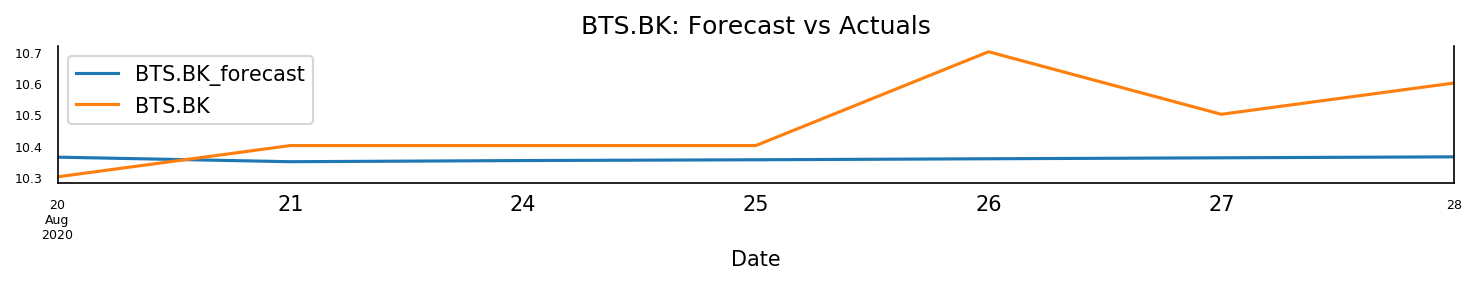

In [25]:


fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(10,2))
# fig, axes = plt.subplots(nrows=int(len(PTT.columns)), ncols=1, dpi=150, figsize=(10,10))

# for i, (col,ax) in enumerate(zip(PTT.columns, axes.flatten())):

ft_results['BTS.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
ft_test['BTS.BK'][-nobs:].plot(legend=True );
axes.set_title('BTS.BK' + ": Forecast vs Actuals")
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')
axes.spines["top"].set_alpha(0)
axes.tick_params(labelsize=6)

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual,train):
    
    n = train.shape[0]
    d = np.abs(  np.diff( train) ).sum()/(n-1)
    
    mase = np.mean(np.abs(actual - forecast ))/d
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape (Mean absolute percentage error)':mape*100,  'mae (Mean Absolute Error)': mae, 'rmse (Root Mean Square Error)':rmse, 'mase (Mean absolute scaled error)':mase })

print('Forecast Accuracy of: BTS')
accuracy_prod = forecast_accuracy(ft_results['BTS.BK_forecast'].values, ft_test['BTS.BK'],ft_train['BTS.BK'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

#     ft_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
#     ft_test[col][-nobs:].plot(legend=True, ax=ax);
#     ax.set_title(col + ": Forecast vs Actuals")
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

plt.tight_layout();



In [26]:
# PTT.tail()

In [27]:
# ft_results.tail()

# Evaluate the Forecasts

In [28]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape*100,  'mae': mae, 'rmse':rmse })

print('Forecast Accuracy of: TVO')
accuracy_prod = forecast_accuracy(ft_results['TVO.BK_forecast'].values, ft_test['TVO.BK'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: CC=F')
# accuracy_prod = forecast_accuracy(ft_results['CC=F_forecast'].values, ft_test['CC=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: KC=F')
# accuracy_prod = forecast_accuracy(ft_results['KC=F_forecast'].values, ft_test['KC=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: HG=F')
# accuracy_prod = forecast_accuracy(ft_results['HG=F_forecast'].values, ft_test['HG=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: PL=F')
# accuracy_prod = forecast_accuracy(ft_results['PL=F_forecast'].values, ft_test['PL=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: ALI=F')
# accuracy_prod = forecast_accuracy(ft_results['ALI=F_forecast'].values, ft_test['ALI=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: SI=F')
# accuracy_prod = forecast_accuracy(ft_results['SI=F_forecast'].values, ft_test['SI=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: GC=F')
# accuracy_prod = forecast_accuracy(ft_results['GC=F_forecast'].values, ft_test['GC=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: NG=F')
# accuracy_prod = forecast_accuracy(ft_results['NG=F_forecast'].values, ft_test['NG=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: CL=F')
# accuracy_prod = forecast_accuracy(ft_results['CL=F_forecast'].values, ft_test['CL=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: AAPL')
# accuracy_prod = forecast_accuracy(ft_results['AAPL_forecast'].values, ft_test['AAPL'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

Forecast Accuracy of: TVO


KeyError: 'TVO.BK_forecast'